## Stroop Task

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import t

**1** What is our independent variable? What is our dependent variable?

The *independent variable* is the list of words that have the two different conditions: congruent and incongruent words. 

The *dependent variable* is the difference in time that subjects take to mention the ink colors in equally-sized lists

**2** What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The null and alternative hypothesis should be as follows:

We define the following variables:
$$\mu_{congruent}: \text{Mean time taken to mention colors in congruent condition.} $$ 
$$\mu_{incongruent}: \text{Mean time taken to mention colors in incongruent condition.} $$

From here, we make the following hypothesis:

$$H_0: \mu_{congruent} = \mu_{incongruent}  $$ 
$$H_A: \mu_{congruent} \leq \mu_{incongruent}  $$ 

In other words, the null hypothesis claims that there is no actual treatment effect. The alternative claims that the incongruent situation will cause subjects to take more time to mention the colors. Note that, here, we are using a one tail directional test (positive). While a double tail test would be more conservative, it is clear that the incongruent condition is a hurdle when mentioning the colors, therefore, we should expect that the time subjects take is greater and not lower than in the congruent condition.

Note that in this case we have dependent samples. This is a within subject experiment. The calculation of the standard error has to take that into account.

**3** Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [28]:
data = pd.read_csv("stroopdata.csv")

Index([u'Congruent', u'Incongruent'], dtype='object')

In [33]:
(data.loc[:, "Congruent"].mean(), data.loc[:, "Congruent"].median(), data.loc[:, "Congruent"].std())

(14.051124999999999, 14.3565, 3.5593579576451955)

In [34]:
(data.loc[:, "Incongruent"].mean(), data.loc[:, "Incongruent"].median(), data.loc[:, "Incongruent"].std())

(22.015916666666666, 21.0175, 4.7970571224691376)


| Statistic | Congruent  | Incongruent  |
|--------|:-----------:|:---------:|
| **Mean**  | 14.05       | 22.01        |
| **Median** | 14.36      | 21.018       |
| **Standard Error **| 3.56 | 4.80  |

In the table above, we report two measures of central tendency: the mean and the median. The median and mean for both groups do not vary too much. Thus, the distributions for both groups do not appear to be positively or negatively shifted. We also calculated the standard error. We used the pandas to calculate the standard error (measure of dispersion). Note that this python library already includes the sample correction (n-1). 

**4** Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

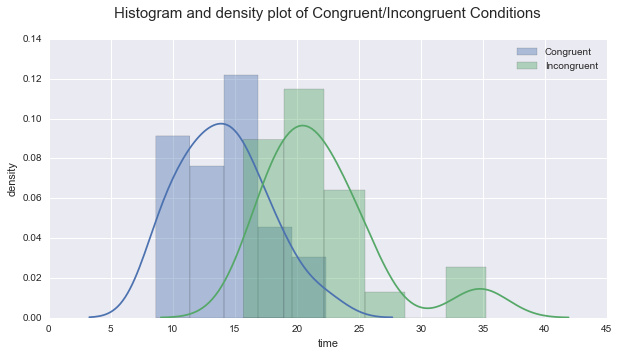

In [85]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(data.loc[:, "Congruent"], label= "Congruent")
ax = sns.distplot(data.loc[:, "Incongruent"], label= "Incongruent")
ax.set(xlabel='time', ylabel='density')
ax.set_title("Histogram and density plot of Congruent/Incongruent Conditions\n",  fontsize=15)
plt.legend()

In [113]:
graph_box_plot = data.stack().reset_index()

In [114]:
graph_box_plot = graph_box_plot.drop("level_0", axis=1)

In [117]:
graph_box_plot.columns = ["condition", "result"]

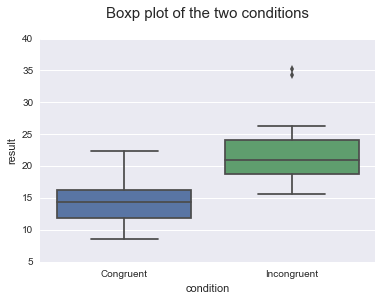

In [119]:
ax = sns.boxplot(x="condition", y="result", data=graph_box_plot)
ax.set_title("Boxp plot of the two conditions\n",  fontsize=15)


From the plots presented above, it is posible to see that there is a difference between the distribution of times between both groups. In particular, the distribution for the incongruent condition is shifted to the right. It appears that subjects in this condition take more time than when there was congruency between name of colors and ink. We still need to verify if this is a statistically significant difference.

**5** Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

To perform the test, we choose a level of siginicance, $\alpha = 0.05$. In the following lines, we perform a t-test for a dependent sample.
I will follow these steps:
1. Find the difference between the means of the two conditions.
2. Find standar error: $\frac{s}{\sqrt{n}}$.
3. Compute the t-statistic.
4. Compare it with the critical value for a one tail test.

Note that the hypothesis that we test here are laid out in the answer to question 2.


In [128]:
# Step 1 
mean_difference = data.loc[:, "Incongruent"].mean() - data.loc[:, "Congruent"].mean() 
mean_difference

7.9647916666666667

In [159]:
# Step 2
sem = data.loc[:, "Congruent"].std() / np.sqrt(len(data))
sem

0.72655090067879902

In [153]:
#Step 3
t_stat = mean_difference / sem
t_stat

10.9624689188677

In [173]:
#Step 4 
degrees_freedom = len(data) - 1
critical_value = t.ppf(0.95, degrees_freedom)
critical_value

1.7138715277470473

We calculate the critical value using the inverse of the cumulative function. Note that our calculated p-value falls to the right of our critical value. That is, it follows within the critical region. In this sense, we are able to **reject the null hypothesis**. We can also find the exact p value of our t statistic. For that, we can use the cumulative density function of the t distribution.

In [181]:
p_value = t.cdf(t_stat, degrees_freedom)
p_value

0.99999999993431643

t(23)=10.96, p=.99, direction one tail right.

*Calculating confidence intervals.*  First, we need to calculate the confidence intervals for a significance level of 0.05. Note that in this case, we need the two tail critical value.

In [182]:
ci_crit_value = t.ppf(0.975, degrees_freedom)
ci_crit_value

2.0686576104190406

In [185]:
left_ci = mean_difference - (ci_crit_value*sem)
left_ci 

6.4618066166206605

In [186]:
upp_ci = mean_difference + (ci_crit_value*sem)
upp_ci

9.4677767167126721

95% CI = (2.069, 6.46)

**Effect size measures**

In [187]:
#Cohen's d
mean_difference / data.loc[:, "Congruent"].std()

2.2377045976954855

Cohen's d measure shows that the difference between both means is more than two standard deviations appart. 

In [188]:
#R squared
(t_stat**2)/float(t_stat**2 + degrees_freedom)

0.83935824293826544

We also have a very big R squared. This means that approximately 83% of the variation in time taken by the individuals can be explain by the treatment (incongruency).

It is clear that there was a significant and considerable difference between these two conditions. As these results were obtain after an experiment was conducted, we can claim causality. That is, *the incongruent condition causes subjects to take more time when mentioning the ink name of the colors*.

**6** Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

After reading the corresponding [wikepedia entry](https://en.wikipedia.org/wiki/Stroop_effect) for the Stroop Effect, one can see that there are different explanations why subjects take more time in the incongruent condition. Basically, scientist pose that there is a lag between recognizing a color and reading the word. For some scientist, recognizing the words is something automatic, recognizing the color is cognitively more challenging. Therefore, when individuals need to concentrate on the colors, it takes more time.

There are many other tasks where this effect is also pervasive. For example, asking the subjects to say which number is bigger, where the size of the number does not correspond to its value. For example showing a huge one and a tiny 50 and ask the subject which one is bigger. 